Student ID：9947609

According to the World Health Organization Data, stroke accounts for 11% of global deaths each year.
The project uses machine learning to predict whether a patient is likely to have a stroke based on known characteristics such as gender, age, and smoking status. Each row in the data provides relevant information about the patient.

### 1. Import library and read data

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 



In [180]:
# https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
df=pd.read_csv("../dataset/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [181]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Missing value processing

In [182]:
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

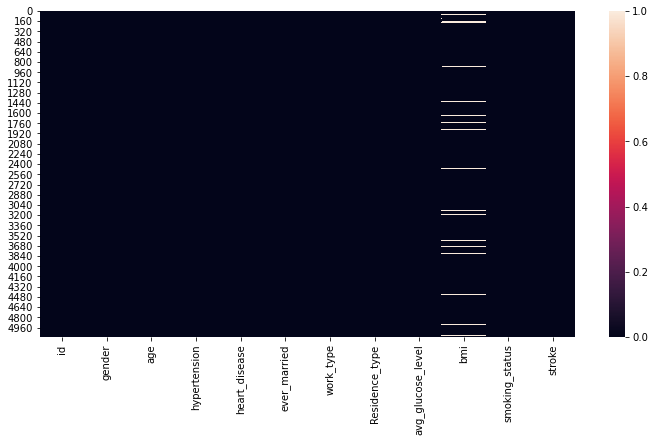

In [183]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize = (12,6))
sns.heatmap(df.isnull())
plt.show()

In [184]:
data = df.replace(to_replace="?", value=np.NaN)
data = data.dropna()


In [185]:
data.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

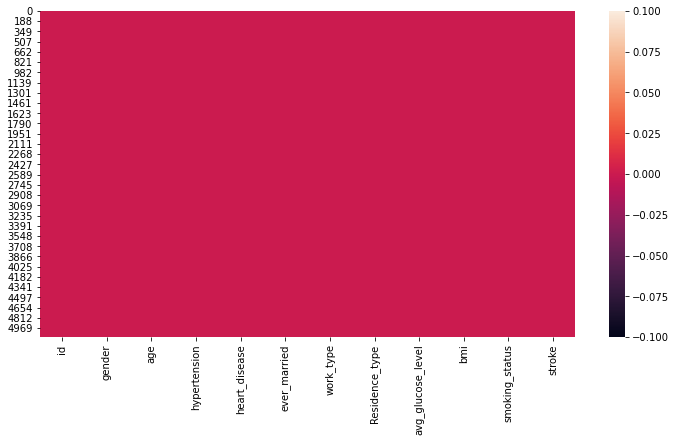

In [186]:
plt.figure(figsize = (12,6))
sns.heatmap(data.isnull())
plt.show()

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


### Characteristic Engineering

In [188]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [189]:
data=data.drop('id', axis=1)


### Data type conversion

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [191]:
stringFeature= ['gender','ever_married','work_type','Residence_type','smoking_status']

floatFeature=['age','avg_glucose_level', 'bmi']

In [192]:
from sklearn.preprocessing import LabelEncoder

for i in stringFeature:
    temp = LabelEncoder()
    data[i] = temp.fit_transform(data[i])
    

In [193]:
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


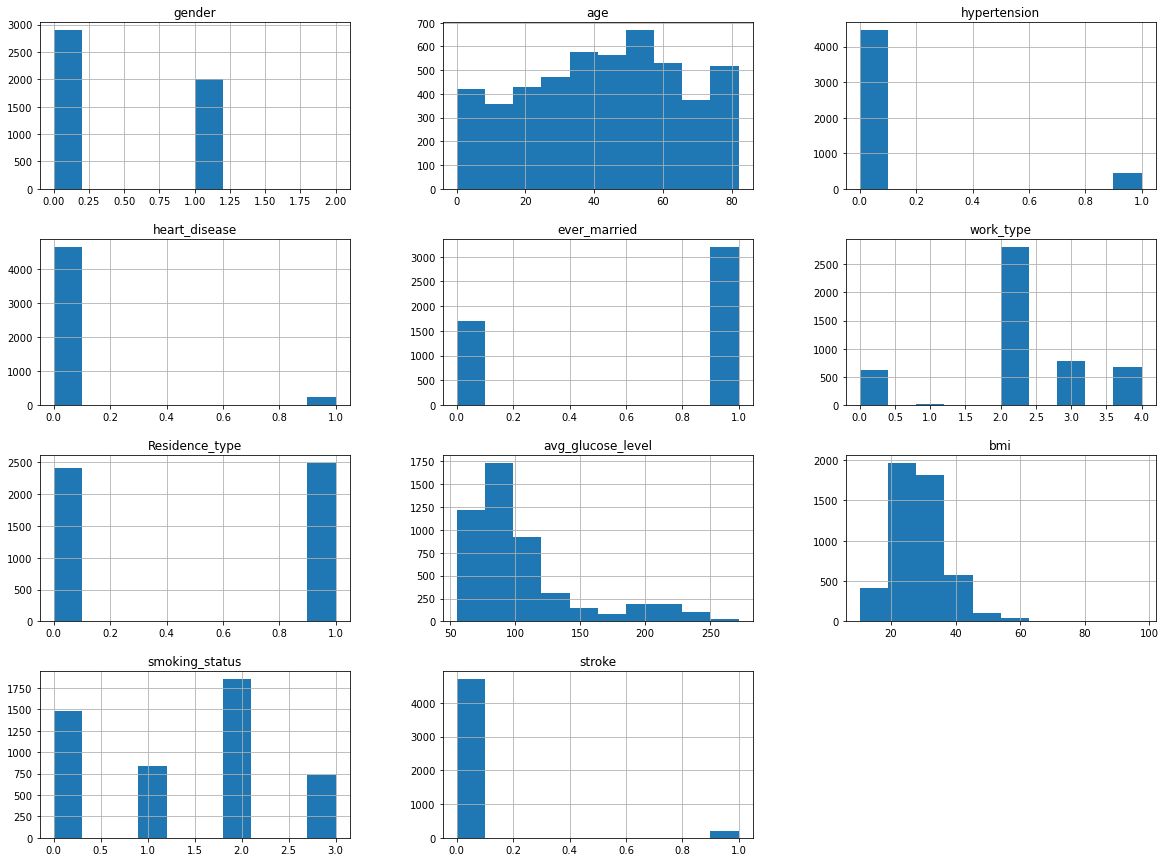

In [194]:
data.hist(figsize=(20,15))
plt.show()

In [195]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


<AxesSubplot:>

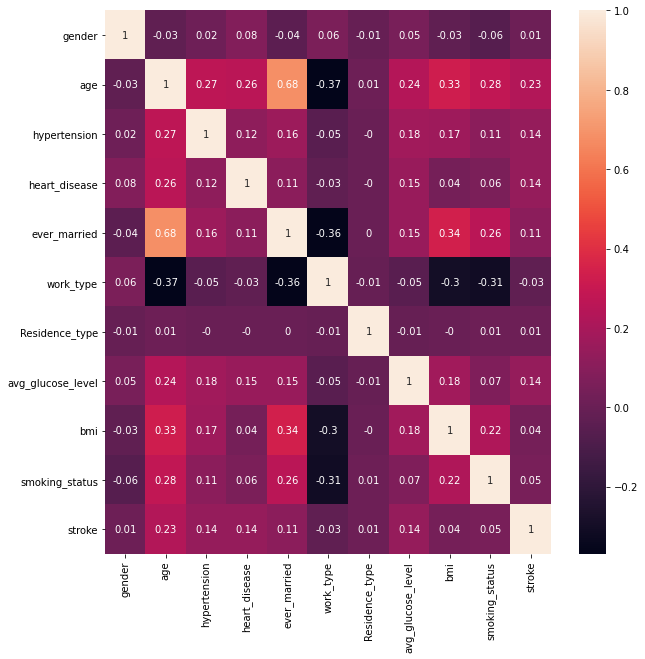

In [196]:
correlation_maxtrix=data.corr().round(2)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_maxtrix,annot=True)

### Distinguish data

In [197]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

max=0
size_val=[0.1,0.2,0.3,0.4,0.5]
for i in size_val:
    from sklearn.model_selection import train_test_split, cross_val_score
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=i,random_state=0)
    X_train.shape,y_train.shape,X_test.shape,y_test.shape
    
   
    model_logisticRegression=LogisticRegression(max_iter=500)
    model_logisticRegression.fit(X_train,y_train)

    y_test_pred=model_logisticRegression.predict(X_test)
    y_train_pred=model_logisticRegression.predict(X_train)

    accuracy_logisticRegression=accuracy_score(y_test,y_test_pred)
    print("size_val=",i,":",accuracy_logisticRegression)
    if accuracy_logisticRegression>max:
        max=accuracy_logisticRegression
        best_size=i
print("=====================")
print("best_size:",best_size)
    


size_val= 0.1 : 0.9511201629327902
size_val= 0.2 : 0.9562118126272913
size_val= 0.3 : 0.9633401221995926
size_val= 0.4 : 0.9582484725050916
size_val= 0.5 : 0.960081466395112
best_size: 0.3


### Variable storage

In [198]:
model_name=[]
accuracy_val=[]
cross_val=[]

### Logistic regression model

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_logisticRegression=LogisticRegression(max_iter=500)
model_logisticRegression.fit(X_train,y_train)

y_test_pred=model_logisticRegression.predict(X_test)
y_train_pred=model_logisticRegression.predict(X_train)

accuracy_logisticRegression=accuracy_score(y_test,y_test_pred)
accuracy_logisticRegression

# model_name.append("model_logisticRegression")
# accuracy_val.append(accuracy_logisticRegression)

0.960081466395112

<AxesSubplot:>

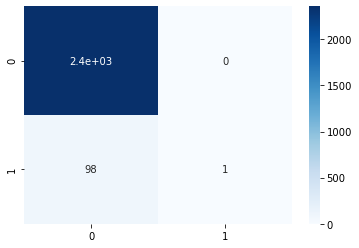

In [200]:
# LogisticRegression
from sklearn.metrics import confusion_matrix
confusion_matrix_res=confusion_matrix(y_test,y_test_pred)
sns.heatmap(confusion_matrix_res,annot=True,cmap="Blues")

In [201]:
from sklearn.metrics import classification_report
target_name=["Rejected","Accepted"]
report=classification_report(y_test,y_test_pred,target_names=target_name)
print(LogisticRegression)
print(report)

from sklearn.metrics import mean_squared_error,r2_score
print('MSE：',mean_squared_error(y_test,y_test_pred))
print('MSE(Streat calculate)：',np.mean((y_test-y_test_pred)**2))
print('RMSE：',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print("r2:",r2_score(y_test,y_test_pred))

<class 'sklearn.linear_model._logistic.LogisticRegression'>
              precision    recall  f1-score   support

    Rejected       0.96      1.00      0.98      2356
    Accepted       1.00      0.01      0.02        99

    accuracy                           0.96      2455
   macro avg       0.98      0.51      0.50      2455
weighted avg       0.96      0.96      0.94      2455

MSE： 0.039918533604887986
MSE(Streat calculate)： 0.039918533604887986
RMSE： 0.19979623020689852
r2: -0.0314949151961037


### KNeighborsClassifier

In [202]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model_KNeighborsClassifier=KNeighborsClassifier()
model_KNeighborsClassifier.fit(X_train,y_train)

y_test_pred=model_KNeighborsClassifier.predict(X_test)
y_train_pred=model_logisticRegression.predict(X_train)

accuracy_KNeighborsClassifier=accuracy_score(y_test,y_test_pred)
accuracy_KNeighborsClassifier

0.9556008146639511

<AxesSubplot:>

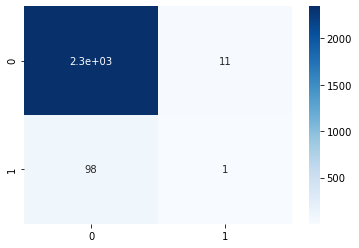

In [203]:
# model_KNeighborsClassifier
from sklearn.metrics import confusion_matrix
confusion_matrix_res=confusion_matrix(y_test,y_test_pred)
sns.heatmap(confusion_matrix_res,annot=True,cmap="Blues")

In [204]:
from sklearn.metrics import classification_report
target_name=["Rejected","Accepted"]
report=classification_report(y_test,y_test_pred,target_names=target_name)
print("KNeighborsClassifier")
print(report)

from sklearn.metrics import mean_squared_error,r2_score
print('MSE：',mean_squared_error(y_test,y_test_pred))
print('MSE(Streat calculate)：',np.mean((y_test-y_test_pred)**2))
print('RMSE：',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print("r2:",r2_score(y_test,y_test_pred))

KNeighborsClassifier
              precision    recall  f1-score   support

    Rejected       0.96      1.00      0.98      2356
    Accepted       0.08      0.01      0.02        99

    accuracy                           0.96      2455
   macro avg       0.52      0.50      0.50      2455
weighted avg       0.92      0.96      0.94      2455

MSE： 0.04439918533604888
MSE(Streat calculate)： 0.04439918533604888
RMSE： 0.21071114193617974
r2: -0.14727495669770718


### MLPClassifier

In [205]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
model_MLPClassifier=MLPClassifier(random_state=0,max_iter=1200)
model_MLPClassifier.fit(X_train,y_train)

y_test_pred=model_MLPClassifier.predict(X_test)
y_train_pred=model_MLPClassifier.predict(X_train)


accuracy_MLPClassifier=accuracy_score(y_test,y_test_pred)
accuracy_MLPClassifier

0.9584521384928717

<AxesSubplot:>

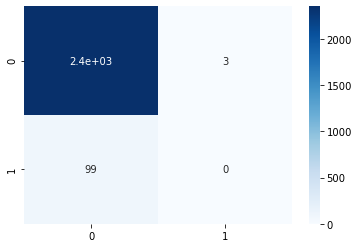

In [206]:
# model_MLPClassifier
from sklearn.metrics import confusion_matrix
confusion_matrix_res=confusion_matrix(y_test,y_test_pred)
sns.heatmap(confusion_matrix_res,annot=True,cmap="Blues")

In [207]:
from sklearn.metrics import classification_report
target_name=["Rejected","Accepted"]
report=classification_report(y_test,y_test_pred,target_names=target_name)
print("MLPClassifier")
print(report)

from sklearn.metrics import mean_squared_error,r2_score
print('MSE：',mean_squared_error(y_test,y_test_pred))
print('MSE(Streat calculate)：',np.mean((y_test-y_test_pred)**2))
print('RMSE：',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print("r2:",r2_score(y_test,y_test_pred))

MLPClassifier
              precision    recall  f1-score   support

    Rejected       0.96      1.00      0.98      2356
    Accepted       0.00      0.00      0.00        99

    accuracy                           0.96      2455
   macro avg       0.48      0.50      0.49      2455
weighted avg       0.92      0.96      0.94      2455

MSE： 0.04154786150712831
MSE(Streat calculate)： 0.04154786150712831
RMSE： 0.20383292547360524
r2: -0.073596748469414


### Feature scaling

In [208]:
from sklearn.preprocessing import StandardScaler
def standardScalerFun(X_train,X_test):
    standardScaler=StandardScaler()
    X_train_standardScaler=standardScaler.fit_transform(X_train)
    X_test_standardScaler=standardScaler.transform(X_test)
    return X_train_standardScaler,X_test_standardScaler

In [209]:
from sklearn.preprocessing import MinMaxScaler
def minMaxScalerFun(X_train,X_test):
    minMaxScaler=MinMaxScaler()
    X_train_minMaxScaler=minMaxScaler.fit_transform(X_train)
    X_test_minMaxScaler=minMaxScaler.fit_transform(X_test)
    return X_train_minMaxScaler,X_test_minMaxScaler


In [210]:
from sklearn.preprocessing import RobustScaler
def robustScalerFun(X_train,X_test):
    robustScaler=RobustScaler()
    X_train_robustScaler=robustScaler.fit_transform(X_train)
    X_test_robustScaler=robustScaler.fit_transform(X_test)
    return X_train_robustScaler,X_test_robustScaler


In [211]:
from sklearn.preprocessing import Normalizer
def normalizerFun(X_train,X_test):
    normalizer=Normalizer()
    X_train_normalizer=normalizer.fit_transform(X_train)
    X_test_normalizer=normalizer.fit_transform(X_test)
    return X_train_normalizer,X_test_normalizer


In [212]:
from sklearn.metrics import mean_squared_error,r2_score
def fittingSituation(y_test,Y_pred):
    print('MSE：',mean_squared_error(y_test,Y_pred))
    print('MSE(Streat calculate)：',np.mean((y_test-Y_pred)**2))
    print('RMSE：',np.sqrt(mean_squared_error(y_test,Y_pred)))
    print("r2:",r2_score(y_test,Y_pred))

In [213]:
# model_logisticRegression函数
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
def logisticRegressionFun(X_train_scaling,X_test_scaling,y_train,y_test):
    model_logisticRegression=LogisticRegression()
    model_logisticRegression.fit(X_train_scaling,y_train)

    y_test_pred=model_logisticRegression.predict(X_test_scaling)

    accuracy_logisticRegression=accuracy_score(y_test,y_test_pred)
    return accuracy_logisticRegression,model_logisticRegression

In [214]:
# 不同Feature scaling下LogisticRegression的结果

X_train_ori,X_test_ori,y_train_ori,y_test_ori = train_test_split(X,y,test_size=0.3,random_state=0)
X_train_ori.shape,y_train_ori.shape,X_test_ori.shape,y_test_ori.shape

X_train_scaling,X_test_scaling=standardScalerFun(X_train_ori,X_test_ori)
standard_accuracy_logisticRegression,standard_model_logisticRegression=logisticRegressionFun(X_train_scaling,X_test_scaling,y_train_ori,y_test_ori)
model_name.append("standard_model_logisticRegression")
accuracy_val.append(standard_accuracy_logisticRegression)
print("standard_accuracy_logisticRegression:",standard_accuracy_logisticRegression)

X_train_scaling,X_test_scaling=minMaxScalerFun(X_train_ori,X_test_ori)
minMax_accuracy_logisticRegression,minMax_model_logisticRegression=logisticRegressionFun(X_train_scaling,X_test_scaling,y_train_ori,y_test_ori)
model_name.append("minMax_model_logisticRegression")
accuracy_val.append(minMax_accuracy_logisticRegression)
print("minMax_accuracy_logisticRegression:",minMax_accuracy_logisticRegression)

X_train_scaling,X_test_scaling=robustScalerFun(X_train_ori,X_test_ori)
robust_accuracy_logisticRegression,robust_model_logisticRegression=logisticRegressionFun(X_train_scaling,X_test_scaling,y_train_ori,y_test_ori)
model_name.append("robust_model_logisticRegression")
accuracy_val.append(robust_accuracy_logisticRegression)
print("robust_accuracy_logisticRegression:",minMax_accuracy_logisticRegression)

X_train_scaling,X_test_scaling=normalizerFun(X_train_ori,X_test_ori)
normalize_accuracy_logisticRegression,normalize_model_logisticRegression=logisticRegressionFun(X_train_scaling,X_test_scaling,y_train_ori,y_test_ori)
model_name.append("normalize_model_logisticRegression")
accuracy_val.append(normalize_accuracy_logisticRegression)
print("normalize_accuracy_logisticRegression:",normalize_accuracy_logisticRegression)





standard_accuracy_logisticRegression: 0.9633401221995926
minMax_accuracy_logisticRegression: 0.9633401221995926
robust_accuracy_logisticRegression: 0.9633401221995926
normalize_accuracy_logisticRegression: 0.9626612355736592


### KNeighborsClassifier Feature scaling

In [215]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def KNeighborsClassifierFun(X_train_scaling,X_test_scaling,y_train,y_test):

    
    model_KNeighborsClassifier=KNeighborsClassifier()
    model_KNeighborsClassifier.fit(X_train_scaling,y_train)

    Y_pred=model_KNeighborsClassifier.predict(X_test_scaling)
    accuracy_KNeighborsClassifier=accuracy_score(y_test,Y_pred)
    return accuracy_KNeighborsClassifier,model_KNeighborsClassifier

In [216]:
# 不同Feature scaling下LogisticRegression的结果



X_train_ori,X_test_ori,y_train_ori,y_test_ori = train_test_split(X,y,test_size=0.3,random_state=0)
X_train_ori.shape,y_train_ori.shape,X_test_ori.shape,y_test_ori.shape

X_train_scaling,X_test_scaling=standardScalerFun(X_train_ori,X_test_ori)
standard_accuracy_KNeighborsClassifierFun,standard_model_KNeighborsClassifierFun=KNeighborsClassifierFun(X_train_scaling,X_test_scaling,y_train_ori,y_test_ori)
model_name.append("standard_model_KNeighborsClassifier")
accuracy_val.append(standard_accuracy_KNeighborsClassifierFun)
print("standard_accuracy_KNeighborsClassifier:",standard_accuracy_logisticRegression)

X_train_scaling,X_test_scaling=minMaxScalerFun(X_train_ori,X_test_ori)
minMax_accuracy_KNeighborsClassifier,minMax_model_KNeighborsClassifier=KNeighborsClassifierFun(X_train_scaling,X_test_scaling,y_train_ori,y_test_ori)
model_name.append("minMax_model_KNeighborsClassifier")
accuracy_val.append(minMax_accuracy_KNeighborsClassifier)
print("minMax_accuracy_KNeighborsClassifier:",minMax_accuracy_KNeighborsClassifier)

X_train_scaling,X_test_scaling=robustScalerFun(X_train_ori,X_test_ori)
robust_accuracy_KNeighborsClassifier,robust_model_KNeighborsClassifier=KNeighborsClassifierFun(X_train_scaling,X_test_scaling,y_train_ori,y_test_ori)
model_name.append("robust_model_KNeighborsClassifier")
accuracy_val.append(robust_accuracy_KNeighborsClassifier)
print("robust_accuracy_KNeighborsClassifier:",robust_accuracy_KNeighborsClassifier)

X_train_scaling,X_test_scaling=normalizerFun(X_train_ori,X_test_ori)
normalize_accuracy_KNeighborsClassifier,normalize_model_KNeighborsClassifier=KNeighborsClassifierFun(X_train_scaling,X_test_scaling,y_train_ori,y_test_ori)
model_name.append("normalize_model_KNeighborsClassifier")
accuracy_val.append(normalize_accuracy_KNeighborsClassifier)
print("normalize_accuracy_KNeighborsClassifier:",normalize_accuracy_KNeighborsClassifier)

    

standard_accuracy_KNeighborsClassifier: 0.9633401221995926
minMax_accuracy_KNeighborsClassifier: 0.9558723693143245
robust_accuracy_KNeighborsClassifier: 0.9613034623217923
normalize_accuracy_KNeighborsClassifier: 0.9572301425661914


### MLPClassifier Feature scaling

In [217]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
def MLPClassifierFun(X_train_scaling,X_test_scaling,y_train,y_test):
    model_MLPClassifier=MLPClassifier(random_state=0,max_iter=1200)
    model_MLPClassifier.fit(X_train_scaling,y_train)

    Y_pred=model_MLPClassifier.predict(X_test_scaling)
    accuracy_MLPClassifier=accuracy_score(y_test,Y_pred)
    return accuracy_MLPClassifier,model_MLPClassifier

In [218]:
# 不同Feature scaling下LogisticRegression的结果
X_train_ori,X_test_ori,y_train_ori,y_test_ori = train_test_split(X,y,test_size=0.3,random_state=0)
X_train_ori.shape,y_train_ori.shape,X_test_ori.shape,y_test_ori.shape

X_train_scaling,X_test_scaling=standardScalerFun(X_train_ori,X_test_ori)
standard_accuracy_logisticRegression,standard_model_logisticRegression=MLPClassifierFun(X_train_scaling,X_test_scaling,y_train_ori,y_test_ori)
model_name.append("standard_model_MLPClassifier")
accuracy_val.append(standard_accuracy_logisticRegression)
print("standard_accuracy_MLPClassifier:",standard_accuracy_logisticRegression)

X_train_scaling,X_test_scaling=minMaxScalerFun(X_train_ori,X_test_ori)
minMax_accuracy_MLPClassifier,minMax_model_MLPClassifier=MLPClassifierFun(X_train_scaling,X_test_scaling,y_train_ori,y_test_ori)
model_name.append("minMax_model_MLPClassifier")
accuracy_val.append(minMax_accuracy_MLPClassifier)
print("minMax_accuracy_MLPClassifier:",minMax_accuracy_MLPClassifier)

X_train_scaling,X_test_scaling=robustScalerFun(X_train_ori,X_test_ori)
robust_accuracy_MLPClassifier,robust_model_MLPClassifier=MLPClassifierFun(X_train_scaling,X_test_scaling,y_train_ori,y_test_ori)
model_name.append("robust_model_MLPClassifier")
accuracy_val.append(robust_accuracy_MLPClassifier)
print("robust_accuracy_MLPClassifier:",robust_accuracy_MLPClassifier)

X_train_scaling,X_test_scaling=normalizerFun(X_train_ori,X_test_ori)
normalize_accuracy_MLPClassifier,normalize_model_MLPClassifier=MLPClassifierFun(X_train_scaling,X_test_scaling,y_train_ori,y_test_ori)
model_name.append("normalize_model_MLPClassifier")
accuracy_val.append(normalize_accuracy_MLPClassifier)
print("normalize_accuracy_MLPClassifier:",normalize_accuracy_MLPClassifier)

standard_accuracy_MLPClassifier: 0.9517990495587237
minMax_accuracy_MLPClassifier: 0.9640190088255262
robust_accuracy_MLPClassifier: 0.9599456890699253
normalize_accuracy_MLPClassifier: 0.9626612355736592


### GridSearch

In [219]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model_KNeighborsClassifier=KNeighborsClassifier()
model_KNeighborsClassifier.fit(X_train,y_train)

y_test_pred=model_KNeighborsClassifier.predict(X_test)
y_train_pred=model_logisticRegression.predict(X_train)

accuracy_KNeighborsClassifier=accuracy_score(y_test,y_test_pred)
accuracy_KNeighborsClassifier




0.9556008146639511

In [220]:
k_list=list(range(1,21))
weight_list=["uniform","distance"]
para_dict=dict(n_neighbors=k_list,weights=weight_list)
print(para_dict)



{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'weights': ['uniform', 'distance']}


In [221]:
from sklearn.model_selection import GridSearchCV
grid1=GridSearchCV(model_KNeighborsClassifier,para_dict,cv=5,scoring="accuracy",return_train_score=False)
# grid1=GridSearchCV(minMax_accuracy_MLPClassifier,para_dict,cv=5,scoring="accuracy",return_train_score=False)
scores = cross_val_score(model_KNeighborsClassifier, X, y, cv=5, scoring='accuracy')
grid1.fit(X,y)
print(scores)



[0.9490835  0.95315682 0.95213849 0.95213849 0.9520897 ]


In [222]:
pd.DataFrame(grid1.cv_results_)[["mean_test_score","params"]]


,mean_test_score,params
0,0.927480,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.927480,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.953962,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.927480,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.946833,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.945610,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.955185,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.945407,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.951721,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.951314,"{'n_neighbors': 5, 'weights': 'distance'}"


In [223]:
print("the best Grid Search model's accuracy:{:.3f}".format(grid1.best_score_))
print("used values:",grid1.best_params_)

the best Grid Search model's accuracy:0.957
used values: {'n_neighbors': 13, 'weights': 'uniform'}


### Random  Search

In [224]:
from sklearn.model_selection import RandomizedSearchCV
RandomGrid1=RandomizedSearchCV(model_KNeighborsClassifier,para_dict,cv=5,scoring="accuracy",return_train_score=False,
                    n_iter=10,random_state=10)

RandomGrid1.fit(X,y)




RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19,
                                                        20],
                                        'weights': ['uniform', 'distance']},
                   random_state=10, scoring='accuracy')

In [225]:
pd.DataFrame(RandomGrid1.cv_results_)[["mean_test_score","params"]]


,mean_test_score,params
0,0.953962,"{'weights': 'uniform', 'n_neighbors': 2}"
1,0.957222,"{'weights': 'distance', 'n_neighbors': 14}"
2,0.957222,"{'weights': 'distance', 'n_neighbors': 18}"
3,0.957222,"{'weights': 'uniform', 'n_neighbors': 16}"
4,0.956407,"{'weights': 'uniform', 'n_neighbors': 8}"
5,0.954981,"{'weights': 'distance', 'n_neighbors': 7}"
6,0.945407,"{'weights': 'distance', 'n_neighbors': 4}"
7,0.957425,"{'weights': 'uniform', 'n_neighbors': 13}"
8,0.957222,"{'weights': 'distance', 'n_neighbors': 16}"
9,0.954777,"{'weights': 'uniform', 'n_neighbors': 7}"


In [226]:
print("the best randomized search model's accuracy:{:.3f}".format(RandomGrid1.best_score_))
print("used values:",RandomGrid1.best_params_)


the best randomized search model's accuracy:0.957
used values: {'weights': 'uniform', 'n_neighbors': 13}


### RandomForestClassifier

In [227]:
#code resource: https://www.kaggle.com/sahikabetul/stroke-prediction-eda-benchmarking-ml-models#Random-Forest-Classifier
from sklearn.ensemble import RandomForestClassifier
model_RandomForestClassifier = RandomForestClassifier()
parameters = {'n_estimators':[10, 20, 50, 100], 'max_depth':[2, 4, 6]}
forest = GridSearchCV(model_RandomForestClassifier, parameters)

#training via RandomForest classficiation model
forest.fit(X_train, y_train)

#make prediction using the test set
y_test_pred= forest.predict(X_test)


accuracy_RandomForestClassifier=accuracy_score(y_test,y_test_pred)
print(accuracy_RandomForestClassifier)

model_name.append("model_RandomForestClassifier")
accuracy_val.append(accuracy_RandomForestClassifier)



0.959674134419552


<AxesSubplot:>

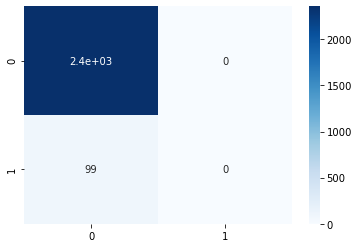

In [228]:
# RandomForestClassifier
from sklearn.metrics import confusion_matrix
confusion_matrix_res=confusion_matrix(y_test,y_test_pred)
sns.heatmap(confusion_matrix_res,annot=True,cmap="Blues")

In [229]:
from sklearn.metrics import classification_report
print("accuracy_RandomForestClassifier",accuracy_RandomForestClassifier)
target_name=["Rejected","Accepted"]
report=classification_report(y_test,y_test_pred,target_names=target_name)
print(report)

from sklearn.metrics import mean_squared_error,r2_score
print('MSE：',mean_squared_error(y_test,y_test_pred))
print('MSE(Streat calculate)：',np.mean((y_test-y_test_pred)**2))
print('RMSE：',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print("r2:",r2_score(y_test,y_test_pred))

accuracy_RandomForestClassifier 0.959674134419552
              precision    recall  f1-score   support

    Rejected       0.96      1.00      0.98      2356
    Accepted       0.00      0.00      0.00        99

    accuracy                           0.96      2455
   macro avg       0.48      0.50      0.49      2455
weighted avg       0.92      0.96      0.94      2455

MSE： 0.04032586558044807
MSE(Streat calculate)： 0.04032586558044807
RMSE： 0.20081301148194572
r2: -0.04202037351443111


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Summary

In [230]:
for i in range(len(accuracy_val)):
    print(i,model_name[i],":",accuracy_val[i])


0 standard_model_logisticRegression : 0.9633401221995926
1 minMax_model_logisticRegression : 0.9633401221995926
2 robust_model_logisticRegression : 0.9633401221995926
3 normalize_model_logisticRegression : 0.9626612355736592
4 standard_model_KNeighborsClassifier : 0.9585879158180584
5 minMax_model_KNeighborsClassifier : 0.9558723693143245
6 robust_model_KNeighborsClassifier : 0.9613034623217923
7 normalize_model_KNeighborsClassifier : 0.9572301425661914
8 standard_model_MLPClassifier : 0.9517990495587237
9 minMax_model_MLPClassifier : 0.9640190088255262
10 robust_model_MLPClassifier : 0.9599456890699253
11 normalize_model_MLPClassifier : 0.9626612355736592
12 model_RandomForestClassifier : 0.959674134419552


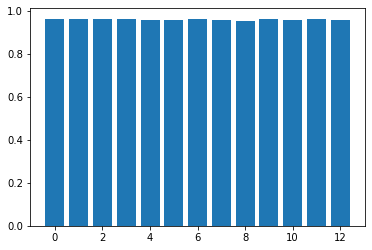

In [231]:
plt.bar(range(len(accuracy_val)), accuracy_val)
plt.xticks=model_name
plt.show()

<BarContainer object of 13 artists>

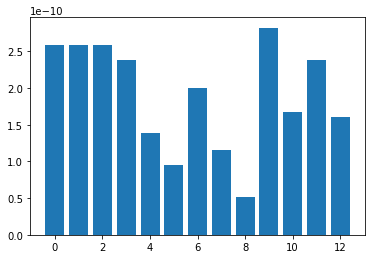

In [232]:

x=[]

for i in accuracy_val:
    x.append((i-0.9)**8)

plt.bar(range(len(x)),x)


In [233]:
index=np.argmax(accuracy_val)
print(model_name[index],"is the heighest：",accuracy_val[index])

minMax_model_MLPClassifier is the heighest： 0.9640190088255262
